<a href="https://colab.research.google.com/github/imcinstitute/ML-labs/blob/main/Lab_II_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginning Machine Learning with scikit-learn

## California Housing Data

One downloadable dataset is the California housing data.  It has a target of house price, and 8 features.  There are 20 thousands samples in it, so it is reasonably large sized.  That is, it is nowhere close to the modern datasets of millions or billions of observations we sometimes work with; but it is also not a toy dataset of dozens or hundreds of observations that are often shown for demonstration purposes (including in prior lessons of this course).

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import requests

column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'MEDV']
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
dataset=pd.read_csv(url, names=column_names, na_values = "?", comment='\t',sep=" ", skipinitialspace=True)


In [ ]:
dataset.tail()

,,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV
0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [ ]:
dataset.shape

(506, 12)

For convenience, it is often useful to massage the standard format of scikit-learn dataset objects.  These objects all have a attributes `.DESCR`, `.feature_names`, `.data`, `.target`.  The latter two are NumPy arrays.  The feature names are simply a Python list of strings.  The description is a single string that has newlines and simple formatting with citations and links inside it.

The California housing dataset has a fairly brief description.  For comparison, the Boston housing dataset has fewer observations but more citational detail.

In [ ]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 506 entries, (0.00632, 18.0) to (0.04741, 0.0)
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    int64  
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   DIS      506 non-null    int64  
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 74.3 KB


In [ ]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
MEDV       0
dtype: int64

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


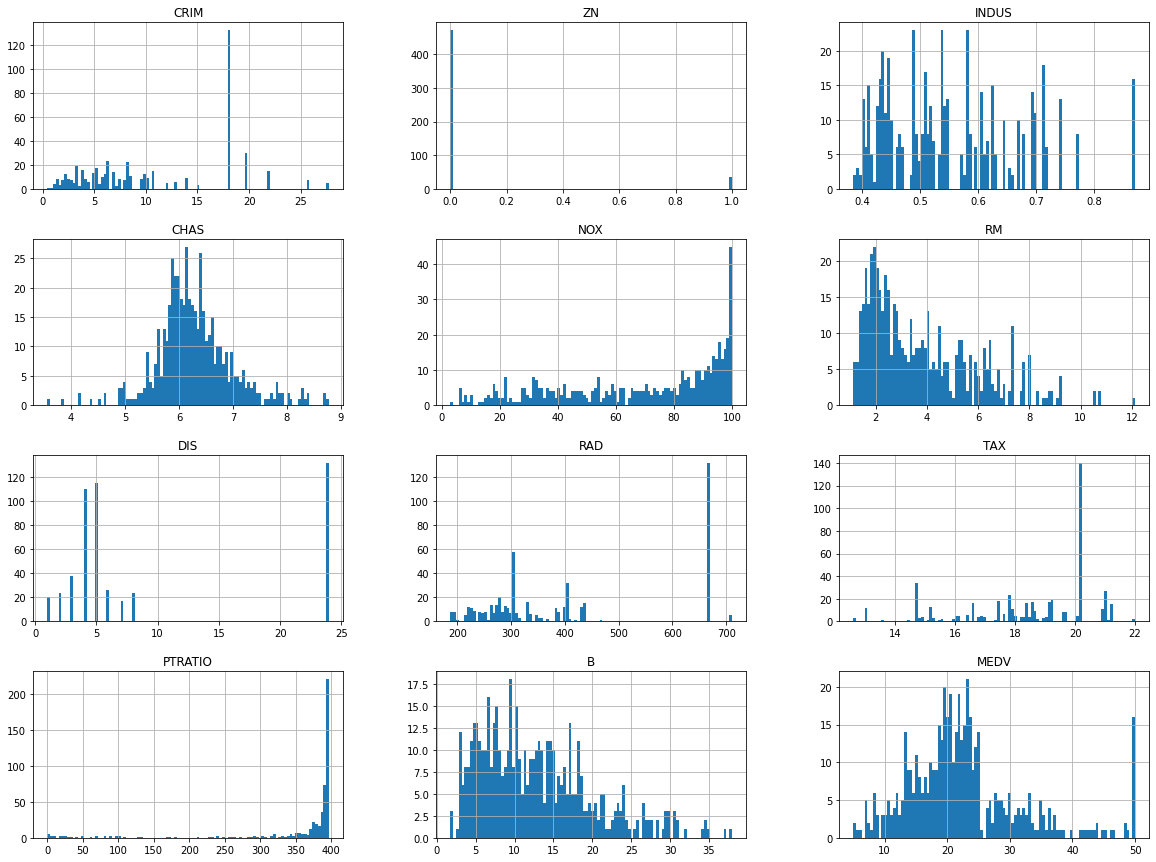

In [ ]:
import matplotlib.pyplot as plt
dataset.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
#Create Train and Evaluate dataset
X = dataset.drop('MEDV',axis=1)
y = dataset['MEDV']


from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)


Training features/target: (404, 11) (404,)
Testing features/target: (102, 11) (102,)


,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,11.077500,6.848412,0.4600,5.19000,9.1250,18.100000,27.7400
ZN,404.0,0.079208,0.270398,0.0000,0.00000,0.0000,0.000000,1.0000
INDUS,404.0,0.553026,0.116895,0.3850,0.44800,0.5350,0.624000,0.8710
CHAS,404.0,6.268792,0.689229,3.5610,5.87675,6.1790,6.626500,8.7800
NOX,404.0,67.935644,28.563186,2.9000,43.25000,76.8000,93.825000,100.0000
RM,404.0,3.826111,2.120999,1.1296,2.10535,3.2986,5.141475,12.1265
DIS,404.0,9.470297,8.680237,1.0000,4.00000,5.0000,24.000000,24.0000
RAD,404.0,403.257426,169.030480,187.0000,277.00000,329.0000,666.000000,711.0000
TAX,404.0,18.438614,2.169469,12.6000,17.22500,19.0000,20.200000,22.0000
PTRATIO,404.0,357.153688,91.541647,0.3200,376.09250,391.5750,396.157500,396.9000


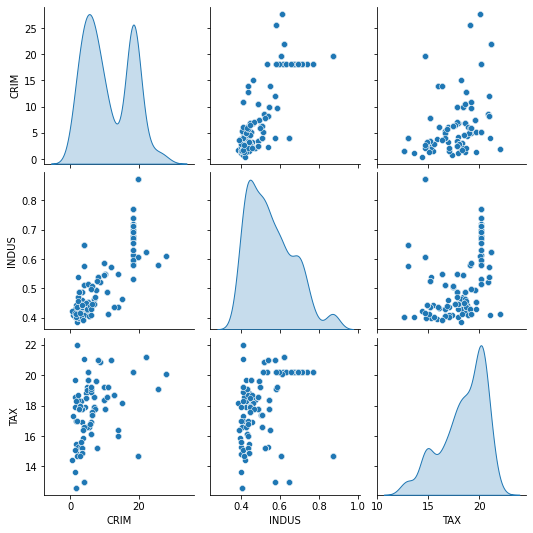

In [ ]:
import seaborn as sns
sns.pairplot(X_train[["CRIM", "INDUS", "TAX"]],
             diag_kind="kde")
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats


In [ ]:
#normalized the data
def norm(x):
 return (x - train_stats['mean']) / train_stats['std']
X_train = norm(X_train)
X_test = norm(X_test)
X_train.tail()
X_test.tail()

,,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B
0.04203,28.0,0.578601,-0.292931,-0.761594,0.251307,-0.501892,-0.075535,-0.630201,-0.788363,-0.109987,0.413542,-0.640006
0.31533,0.0,-0.712209,-0.292931,-0.419405,2.897744,0.362857,-0.439279,-0.169384,-0.569468,-0.478741,0.304739,-1.197070
0.10793,0.0,-0.367603,-0.292931,-0.282530,-0.107065,-0.473884,-0.494253,-0.514997,-0.113929,1.134557,0.396937,0.030688
12.24720,0.0,1.025420,-0.292931,0.264972,-0.626486,-0.288331,-0.862099,1.673883,1.554409,0.811897,-3.632267,0.403450
9.96654,0.0,1.025420,-0.292931,1.599506,0.313695,1.122576,-0.871151,1.673883,1.554409,0.811897,0.323091,0.841342


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The metrics we use in the below code are `explained_variance_score`, `mean_absolute_error`, and `r2_score`. Many other metrics are are available, mostly within the `sklearn.metrics` submodule.

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = model.predict(X_test)
print("\t Explained variance:", explained_variance_score(y_test, predictions))
print("\t Mean absolute error:", mean_absolute_error(y_test, predictions))
print("\t R2 score:", r2_score(y_test, predictions))

	 Explained variance: 0.7679298430366015
	 Mean absolute error: 3.770229765677265
	 R2 score: 0.7673277868963236


The particular regressors we choose does not reflect any deep decision. Most are somewhat in the family of linear regression. RANSAC is tried because it is meant to be more resilient against outliers in data. This is sometimes more strongly predictive than generic linear regression. One of several Gaussian techniques is shown as an example—it behaves worthlessly for this example, at least without hyperparameter tuning.

In [ ]:
from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

regressors = [
    LinearRegression(), 
    RANSACRegressor(), 
    KNeighborsRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan'),
    SVR(),
    LinearSVR(),
    GaussianProcessRegressor(),
    SVR(kernel='linear'), # Cf. LinearSVR: much slower, might be better or worse: 
]

In [ ]:
head = 6
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    predictions = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Training time: 0.002s
	Prediction time: 0.001s
	Explained variance: 0.7679298430366015
	Mean absolute error: 3.770229765677265
	R2 score: 0.7673277868963236

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
	Training time: 0.078s
	Prediction time: 0.001s
	Explained variance: 0.7284010031362382
	Mean absolute error: 3.7319508300689104
	R2 score: 0.7072190179492154

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	Training time: 0.003s
	Prediction time: 0.003s
	Explained variance: 0.8149967220390241
	Mean absolute error: 2.96627

Two models that are very slow to train are omitted in the "live" output in this course.  Those outputs would be the following:

```
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)
    Training time: 161.517s
    Prediction time: 4.571s
    Explained variance: -0.0199393545636
    Mean absolute error: 1.91320341763
    R2 score: -2.79445305731
    
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    Training time: 4458.012s
    Prediction time: 0.843s
    Explained variance: 0.527882057056
    Mean absolute error: 0.601893862699
    R2 score: 0.517431654021
```

Neither of these has an especially good R2 score for this particular data.  `GaussianProcessRegressor` is negative, in fact (which is very bad).  `SVR` with a linear kernel is moderately good, but not better than simple `LinearRegression`.  However, notice that even though training took well over an hour, prediction takes less than a second.  That is not the fasted predictor, but it is also not the slowest among those that train orders of magnitude faster.  If this model performed the best, it might be worth spending the one-time training cost, and then be able to regress sufficiently quickly.

We can see that `DecisionTreeRegressor` is conceptually similar to `DecisionTreeClassifier`.  At certain cut-points in the data (here just one dimension) a switch is made to a different target value.  However, rather than simply predict a flipped boolean value as in the prior lesson, we predict a new quantitative level for the target around cut points.

### Non-linearity in California Housing

Let us try a decision tree style against the multi-dimensional California housing data.  So far, a simple `LinearRegression` was the best we had done against this dataset.  As well as `DecisionTreeRegressor` of several different depths, we will add in `RandomForestRegressor`.  From [the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html):

> A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


regressors = [LinearRegression(),
              DecisionTreeRegressor(max_depth=5),
              DecisionTreeRegressor(max_depth=10),
              DecisionTreeRegressor(max_depth=20),
              RandomForestRegressor(max_depth=10),
              GradientBoostingRegressor(n_estimators=200),
              SVR(),]

for model in regressors:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Explained variance: 0.7679298430366015
	Mean absolute error: 3.770229765677265
	R2 score: 0.7673277868963236

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
	Explained variance: 0.8744695373216704
	Mean absolute error: 2.7937264158536963
	R2 score: 0.8743950938461766

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight